In [ ]:
#   Import library 
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

In [ ]:
#   Import dataset
df = pd.read_csv('English_Dataset.csv')

In [ ]:
#   Cek shape pada dataset
df.shape

(1490, 3)

In [ ]:
#   Cek nama kolom
df.columns

Index(['ArticleId', 'Text', 'Category'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [ ]:
#   Delete kolom yang tidak relevan untuk digunakan
df = df.drop(columns=['ArticleId'])

In [ ]:
#   Cek 5 baris pertama pada data
df.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [ ]:
import re

text = "hey amazon - my package never arrived https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first please fix asap! @amazonhelp"
text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
print(text)

hey amazon  my package never arrived  please fix asap amazonhelp


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding  
df['lwr'] = df['Text'].apply(clean_lower)
casefolding=pd.DataFrame(df['lwr'])
casefolding

,lwr
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
...,...
1485,double eviction from big brother model caprice...
1486,dj double act revamp chart show dj duo jk and ...
1487,weak dollar hits reuters revenues at media gro...
1488,apple ipod family expands market apple has exp...


In [ ]:
#   Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text
#   Buat kolom tambahan untuk data description yang telah diremovepunctuation   
df['clean_punct'] = df['lwr'].apply(clean_punct)
df['clean_punct']

0       worldcom ex boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in  168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: clean_punct, Length: 1490, dtype: object

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#   Clean stopwords
stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text
#   Buat kolom tambahan untuk data description yang telah distopwordsremoval   
df['clean_punct'] = df['clean_punct'].apply(clean_stopwords)

In [ ]:
add = pd.DataFrame(df['clean_punct'])
df['add_swr']= add.replace(to_replace =['whether','yes','also','thanks','take','whatever',
                                        'making','makes','taking','takes','ok','oh','etc',
                                        "yep"],
                           value ="", regex= True) 
df['add_swr']

0       worldcom ex boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses 168m payout eighteen former enron...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm  unwelcome visit thousands website ...
Name: add_swr, Length: 1490, dtype: object

In [ ]:
df.head()

,Text,Category,lwr,clean_punct,add_swr
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...
1,german business confidence slides german busin...,business,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...,enron bosses 168m payout eighteen former enron...,enron bosses 168m payout eighteen former enron...


In [ ]:
#   Melakukan one-hot encoding
category = pd.get_dummies(df.Category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Category')
df_baru

,Text,lwr,clean_punct,add_swr,business,entertainment,politics,sport,tech
0,worldcom ex-boss launches defence lawyers defe...,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,worldcom ex boss launches defence lawyers defe...,1,0,0,0,0
1,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,german business confidence slides german busin...,1,0,0,0,0
2,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...,1,0,0,0,0
3,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...,lifestyle governs mobile choice faster better ...,0,0,0,0,1
4,enron bosses in $168m payout eighteen former e...,enron bosses in $168m payout eighteen former e...,enron bosses 168m payout eighteen former enron...,enron bosses 168m payout eighteen former enron...,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1485,double eviction from big brother model caprice...,double eviction from big brother model caprice...,double eviction big brother model caprice holb...,double eviction big brother model caprice holb...,0,1,0,0,0
1486,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk and ...,dj double act revamp chart show dj duo jk joel...,dj double act revamp chart show dj duo jk joel...,0,1,0,0,0
1487,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues at media gro...,weak dollar hits reuters revenues media group ...,weak dollar hits reuters revenues media group ...,1,0,0,0,0
1488,apple ipod family expands market apple has exp...,apple ipod family expands market apple has exp...,apple ipod family expands market apple expande...,apple ipod family expands market apple expande...,0,0,0,0,1


In [ ]:
berita = df_baru['add_swr'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [ ]:
#   Validation set sebesar 20% dari total dataset
from sklearn.model_selection import train_test_split
berita_latih, berita_test, label_latih, label_test = train_test_split(berita, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(berita_latih) 
 
sekuens_latih = tokenizer.texts_to_sequences(berita_latih)
sekuens_test = tokenizer.texts_to_sequences(berita_test)
 
padded_latih = pad_sequences(sekuens_latih,
                             maxlen=300,
                             padding='post',
                             truncating='post') 
padded_test = pad_sequences(sekuens_test,
                            maxlen=300,
                            padding='post',
                            truncating='post')

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.025),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.025),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 200
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=1, callbacks=[callbacks])

Epoch 1/200
38/38 [==============================] - 6s 52ms/step - loss: 1.5992 - accuracy: 0.2089 - val_loss: 1.5851 - val_accuracy: 0.2852
Epoch 2/200
38/38 [==============================] - 1s 22ms/step - loss: 1.5722 - accuracy: 0.2584 - val_loss: 1.5643 - val_accuracy: 0.2886
Epoch 3/200
38/38 [==============================] - 1s 29ms/step - loss: 1.4842 - accuracy: 0.2978 - val_loss: 1.3403 - val_accuracy: 0.3859
Epoch 4/200
38/38 [==============================] - 1s 26ms/step - loss: 1.4192 - accuracy: 0.3834 - val_loss: 1.3987 - val_accuracy: 0.3624
Epoch 5/200
38/38 [==============================] - 1s 26ms/step - loss: 1.3373 - accuracy: 0.3482 - val_loss: 1.3694 - val_accuracy: 0.3591
Epoch 6/200
38/38 [==============================] - 1s 25ms/step - loss: 1.3404 - accuracy: 0.3599 - val_loss: 1.3663 - val_accuracy: 0.3557
Epoch 7/200
38/38 [==============================] - 1s 23ms/step - loss: 1.3399 - accuracy: 0.3389 - val_loss: 1.3679 - val_accuracy: 0.3490
Epoch 

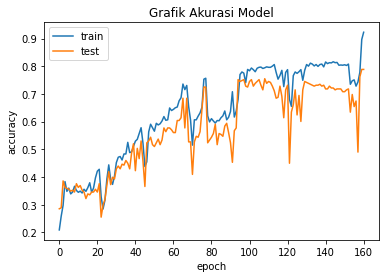

In [ ]:
#   Membuat grafik akurasi model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

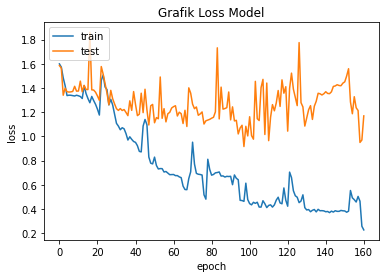

In [ ]:
#   Membuat grafik loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()